In [267]:
import numpy as np
import pandas as pd

data = pd.read_csv('housingdata.csv')

In [268]:
colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data.columns = colnames

In [280]:
import matplotlib.pyplot as plt

def plotting(X):
    plt.figure()
    plt.grid(1)
    plt.plot(data[X],data['MEDV'], marker='.',linestyle='none')
    plt.xlabel(X)
    plt.ylabel('MEDV')

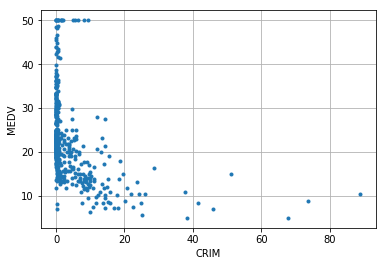

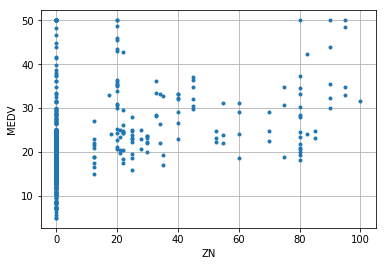

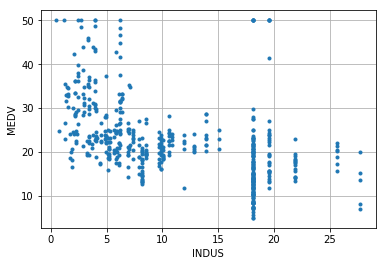

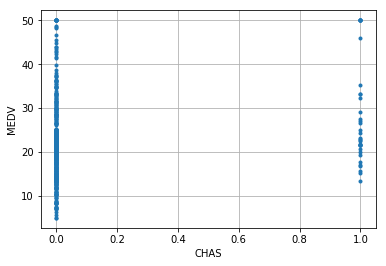

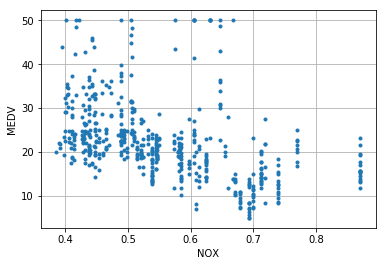

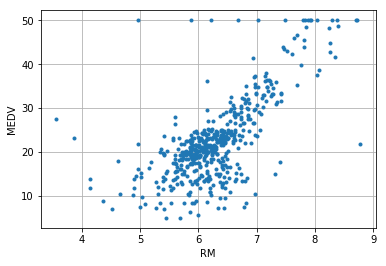

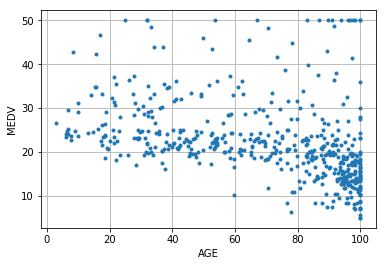

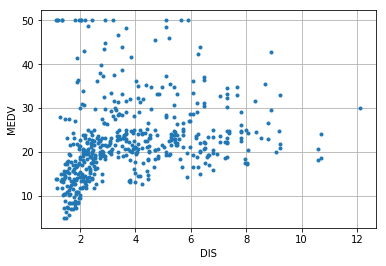

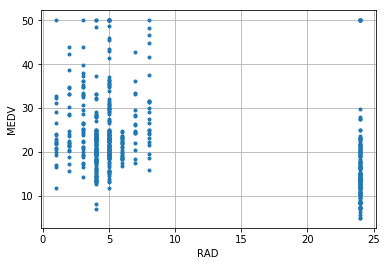

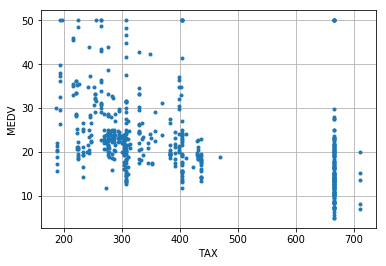

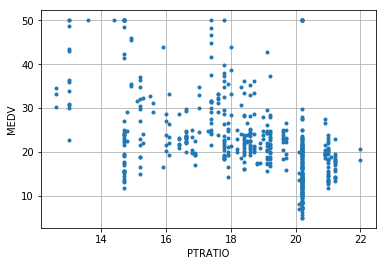

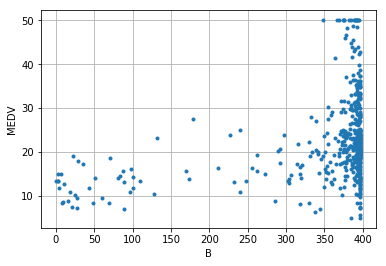

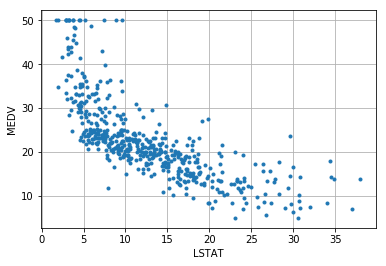

In [281]:
plotting('CRIM')
plotting('ZN') 
plotting('INDUS')
plotting('CHAS')
plotting('NOX')
plotting('RM')
plotting('AGE')
plotting('DIS')
plotting('RAD')
plotting('TAX')
plotting('PTRATIO')
plotting('B')
plotting('LSTAT')

In [272]:
def computeCost(X,y,weights):
    return np.sum(np.square(np.dot(X,weights)-y))/(2*len(y))

In [273]:
features = np.column_stack((data['DIS'],data['RM']))
#features = data['RM']
weights = np.zeros((3,1))
X = np.column_stack((np.ones(len(features)),features))
y = data['MEDV'].values.reshape(len(data['MEDV']),1)
cost = computeCost(X,y,weights)
print(weights)
print(cost)

[[0.]
 [0.]
 [0.]]
296.0734584980237


In [276]:
def gradientDescent(X,y,alpha,iterations,weights):
    x=X[:,1:]
    x=x.reshape(506,2)
    for i in range(iterations):
        temp0=weights[0] - ( (alpha/len(y)) * np.sum(np.dot(X, weights) -y) )
        temp1=weights[1] - ( (alpha/len(y)) * np.sum((np.dot(X, weights) - y)*x[:,0].reshape(506,1)) )
        temp2=weights[2] - ( (alpha/len(y)) * np.sum((np.dot(X, weights) - y)*x[:,1].reshape(506,1)) )
        weights[0]=temp0
        weights[1]=temp1
        weights[2]=temp2
        cost=computeCost(X,y,weights)
        plt.plot(i,cost,marker='.')
        plt.xlabel('iterations')
        plt.ylabel('cost')
        print(cost)
    return cost,weights

81.0450090999809
40.67949442343431
33.00326740278995
31.45093505052676
31.051360176133464
30.873968855673645
30.74424867209631
30.629178700207767
30.52223488300382
30.42187186314483
30.327495427557334
30.238707724996658
30.155164928654784
30.076549561212648
30.002564337389163
29.932930091695937
29.867384526054312
29.805681162946517
29.74758838601024
29.69288854302715
29.64137710384316
29.592861869216158
29.547162227391297
29.50410845550219
29.46354106309095
29.425310175206867
29.389274952697512
29.355303047449883
29.323270090474473
29.29305921085224
29.264560583683732
29.23767100529195
29.21229349403572
29.188336915189637
29.16571562843962
29.14434915663057
29.124161874484912
29.10508271608794
29.087044900008586
29.06998567099237
29.053846057227425
29.038570642244665
29.024107350569867
29.01040724629862
28.99742434381488
28.9851154299212
28.973439896692465
28.96235958440679
28.951838633945854
28.941843348093936
28.941843348093936
[[0.2789204 ]
 [0.74815882]
 [3.14414284]]


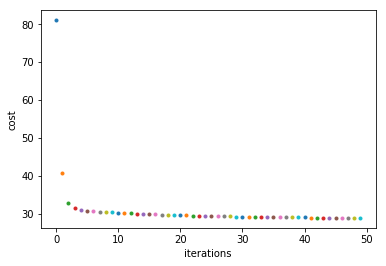

In [277]:
iterations=50
alpha=0.01
cost,weights=gradientDescent(X,y,alpha,iterations,weights)
print(cost)
print(weights)